# 🎵⭐ **Spotify Recommendation System**

- **PLAN**

---


**In this notebook we explore how to build a simple recommender system.**

1. We start with Data and Bussiness case understading

2. Item Based recomendation system.
We will take a look at [Kaggle notebook](https://www.kaggle.com/code/rajesh2222/item-based-recommender-system) with an example.

3. We will build our recommender engine with Open AI embedding model + Vector Database recommender

- #### **Bussiness case**
---

Business Case Analysis: Spotify's AI-Powered Recommendation System

Spotify's recommendation system is a core part of its business strategy, driving user engagement, retention, and revenue growth. Below is an analysis of its business case based on the article.

**1. Business Problem & Opportunity**

Problem:
- The music industry is highly competitive, with multiple streaming platforms (Apple Music, YouTube Music, etc.).
- Users face choice overload with millions of songs available.
- Retaining users and increasing engagement is critical for subscription revenue and ad monetization.

Opportunity:
- A personalized recommendation system can increase user satisfaction, time spent on the platform, and ultimately customer lifetime value (CLV).
- Data-driven AI models can optimize recommendations to keep users engaged and subscribed.


######  ([read more in the article ](https://medium.com/beyond-the-build/the-inner-workings-of-spotifys-ai-powered-music-recommendations-how-spotify-shapes-your-playlist-a10a9148ee8d))

- **What Data do we use?**
---


We use public [Spotify Dataset](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023) from Kaggle.

- This dataset contains a comprehensive list of the most famous songs of 2023 as listed on Spotify.
- It provides insights into each song's attributes, popularity, and presence on various music platforms.
- The dataset includes information such as track name, artist(s) name, release date, Spotify playlists and charts, streaming statistics, Apple Music presence, Deezer presence, Shazam charts, and various audio features.
---
**Our Goal: 🎯 ** Learn Machine Learning and Data analysis concepts by building a Spotify recommender.


In [ ]:
!pip install -q python-dotenv openai faiss-cpu numpy pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 53.3 MB/s eta 0:00:00


## **1. Data Exloratory Analysis** 👀

We start with simply exploring and udnerstaing Spotify dataset. Statistics, missing, unqie values and important distributions visualizations.  

In [ ]:
#1. start with importing libraries, loading dataset and looking at a portion of the dataset


import pandas as pd

df = pd.read_csv('dataset.csv')

df = df.sample(n=100, random_state=42)
df.reset_index(drop=True, inplace=True)

df.head(3)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,113186,6KwkVtXm8OUp2XffN5k7lY,Hillsong Worship,No Other Name,No Other Name,50,440247,False,0.369,0.598,...,-6.984,1,0.0304,0.00511,0.000000,0.176,0.0466,148.014,4,world-music
1,42819,2dp5I5MJ8bQQHDoFaNRFtX,Internal Rot,Grieving Birth,Failed Organum,11,93933,False,0.171,0.997,...,-3.586,1,0.1180,0.00521,0.801000,0.420,0.0294,122.223,4,grindcore
2,59311,5avw06usmFkFrPjX8NxC40,Zhoobin Askarieh;Ali Sasha,Noise A Noise 20.4-1,"Save the Trees, Pt. 1",0,213578,False,0.173,0.803,...,-10.071,0,0.1440,0.61300,0.001910,0.195,0.0887,75.564,3,iranian
3,91368,75hT0hvlESnDJstem0JgyR,Bryan Adams,All I Want For Christmas Is You,Merry Christmas,0,151387,False,0.683,0.511,...,-5.598,1,0.0279,0.40600,0.000197,0.111,0.5980,109.991,3,rock
4,61000,4bY2oZGA5Br3pTE1Jd1IfY,Nogizaka46,バレッタ TypeD,月の大きさ,57,236293,False,0.555,0.941,...,-3.294,0,0.0481,0.48400,0.000000,0.266,0.8130,92.487,4,j-idol


In [ ]:
#check the unique features of the Spotify dataset
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [ ]:
#check for missing values
df.isnull().sum()

,0
Unnamed: 0,0
track_id,0
artists,0
album_name,0
track_name,0
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


In [ ]:
#how many rows and columns in the dataset ?
df.shape

(100, 21)

In [ ]:
# Let's find the unique tracks
df["track_name"].nunique()

100

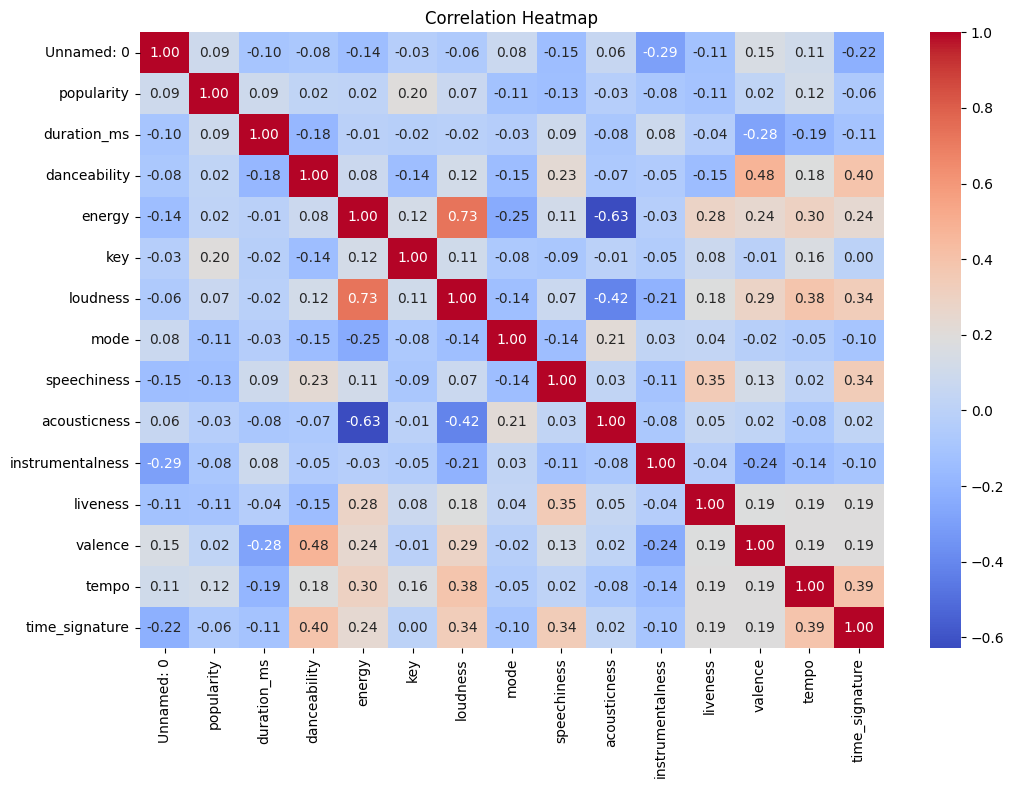

In [ ]:
#Let's create a heatmap. It will help us to see what features are the most corellated to eact and vice versa.
import matplotlib.pyplot as plt
import seaborn as sns

df_numeric = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

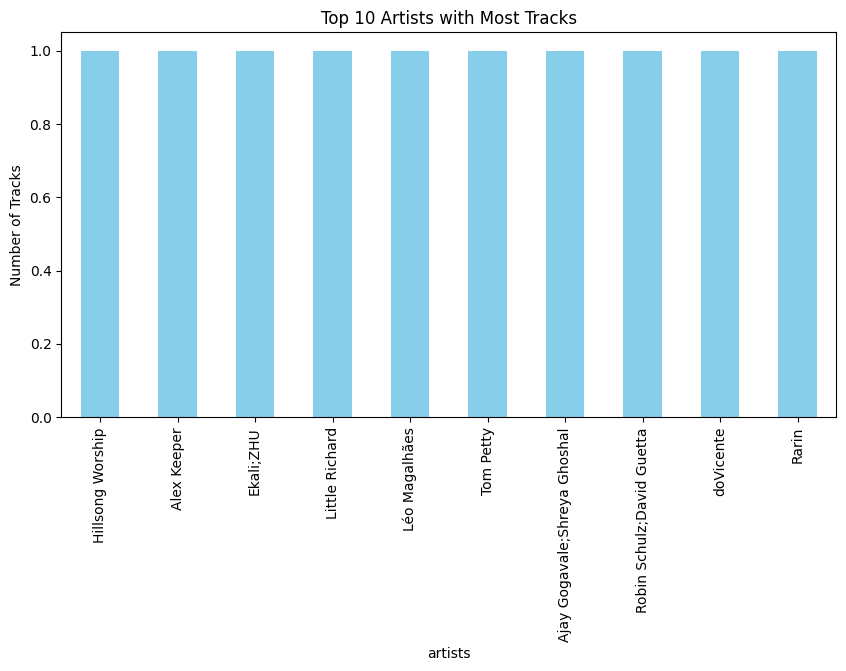

In [ ]:
#Lets plot top 10 songs

plt.figure(figsize=(10, 5))
df['artists'].value_counts().nlargest(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Artists with Most Tracks")
plt.ylabel("Number of Tracks")
plt.show()

## **1.2 Demo of quick and efficient Visualization with an open source tool [Autoviz](https://github.com/AutoViML/AutoViz) 📊**

Shape of your Data Set loaded: (100, 21)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
  Printing up to 30 columns (max) in each category:
    Numeric Columns : ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
    Integer-Categorical Columns: ['key', 'time_signature']
    String-Categorical Columns: ['track_genre']
    Factor-Categorical Columns: []
    String-Boolean Columns: ['explicit']
    Numeric-Boolean Columns: ['mode']
    Discrete String Columns: []
    NLP text Columns: ['artists', 'album_name', 'track_name']
    Date Time Columns: []
    ID Columns: ['Unnamed: 0', 'track_id', 'duration_ms']
    Columns that will not be considered in modeling: []
    20 

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
artists,object,0.000000,100,,,No issue
album_name,object,0.000000,100,,,No issue
track_name,object,0.000000,100,,,No issue
explicit,bool,0.000000,2,0.000000,1.000000,No issue
danceability,float64,0.000000,NA,0.000000,0.914000,Column has 2 outliers greater than upper bound (1.03) or lower than lower bound(0.17). Cap them or remove them.
energy,float64,0.000000,NA,0.000020,0.997000,Column has 1 outliers greater than upper bound (1.27) or lower than lower bound(0.03). Cap them or remove them.
key,int64,0.000000,12,0,11,No issue
loudness,float64,0.000000,NA,-25.556000,-1.807000,Column has 5 outliers greater than upper bound (1.99) or lower than lower bound(-17.48). Cap them or remove them.
mode,int64,0.000000,2,0,1,No issue
speechiness,float64,0.000000,NA,0.000000,0.941000,Column has 13 outliers greater than upper bound (0.18) or lower than lower bound(-0.05). Cap them or remove them.


Number of All Scatter Plots = 45


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

Could not draw wordcloud plot for artists. 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.

Could not draw wordcloud plot for album_name. 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.

Could not draw wordcloud plot for track_name. 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: h

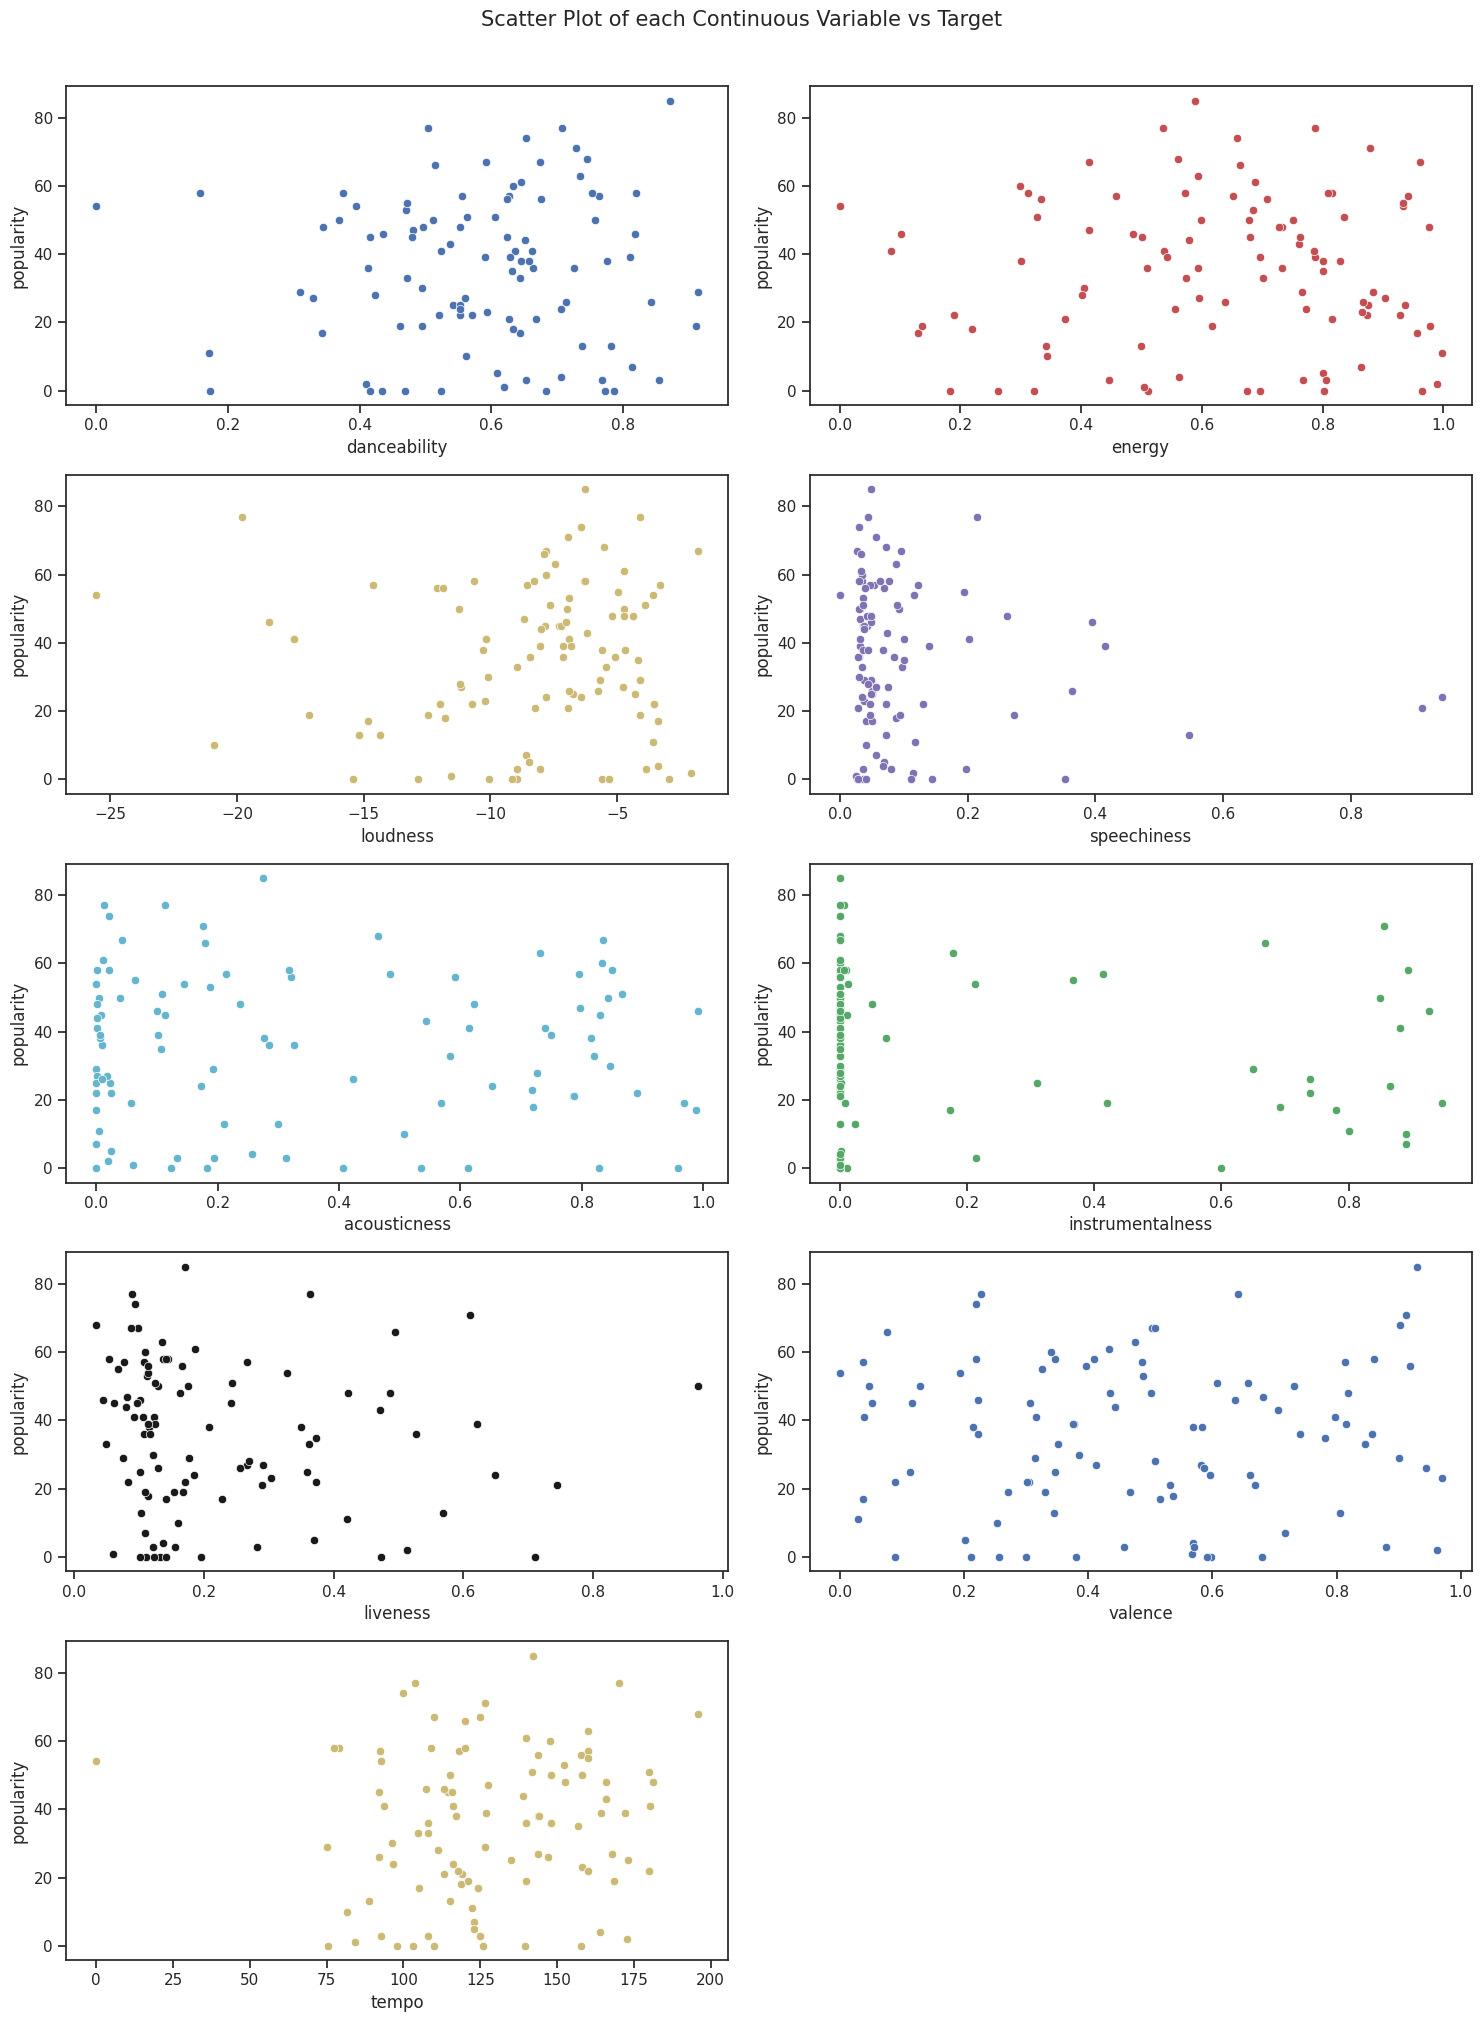

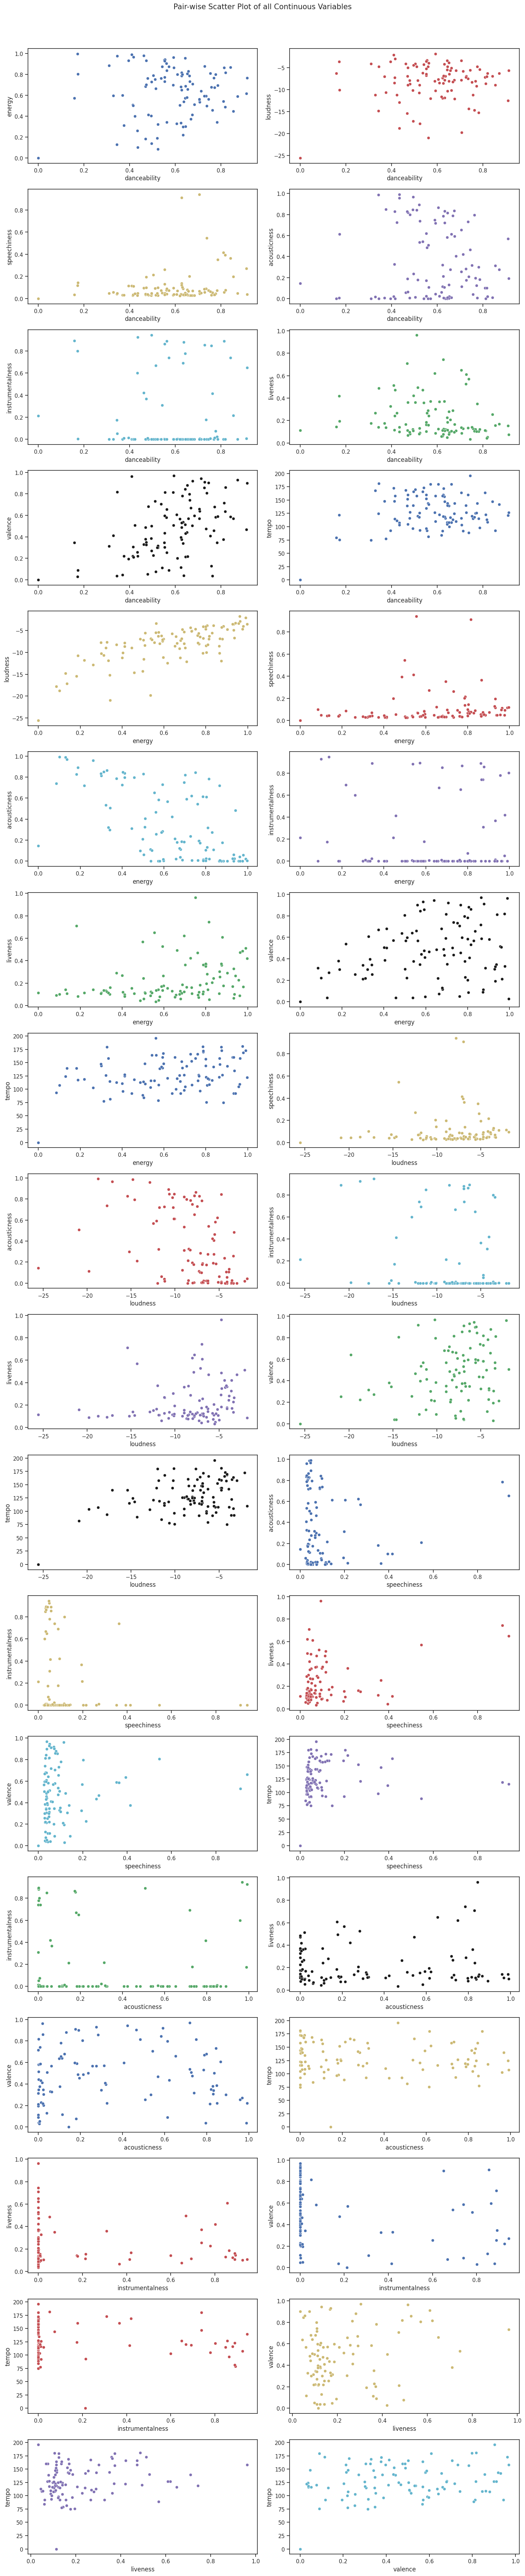

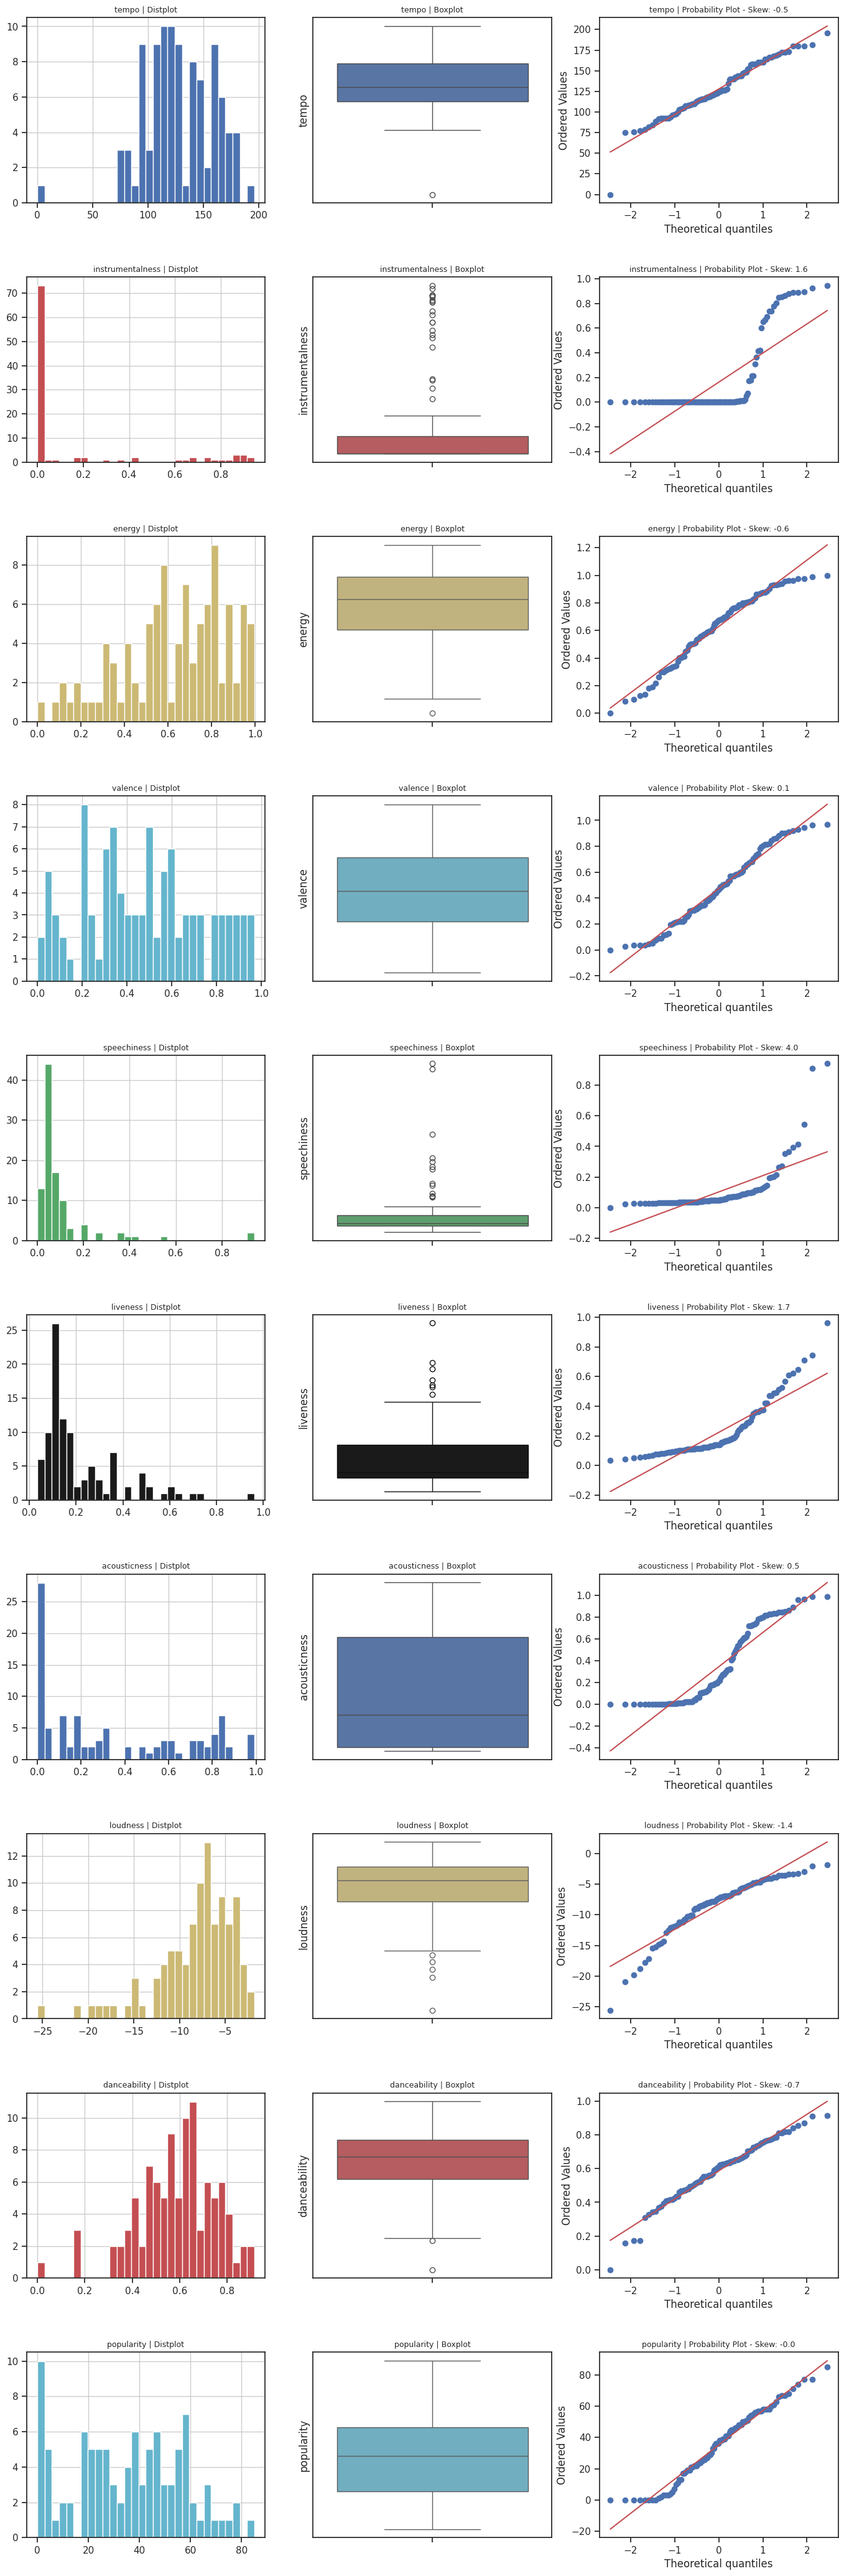

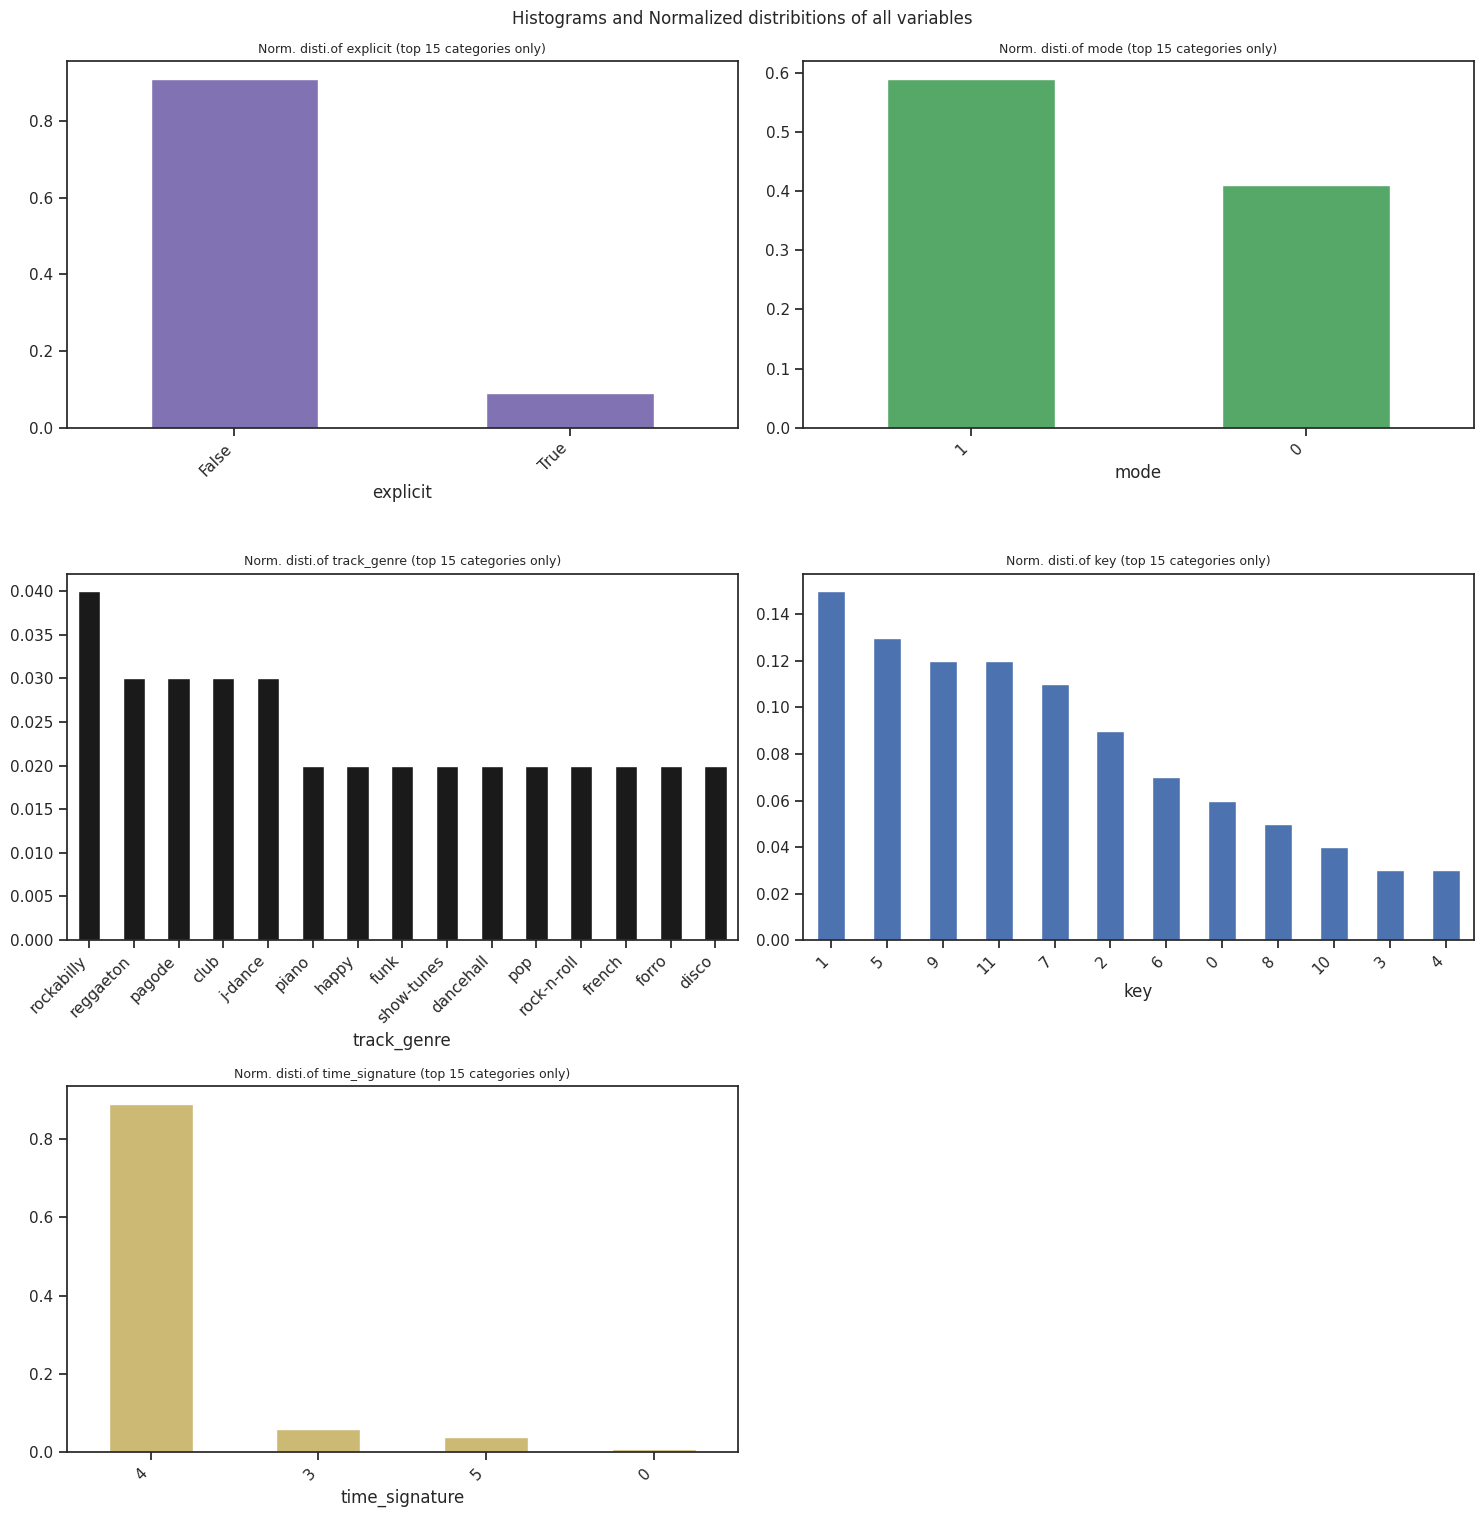

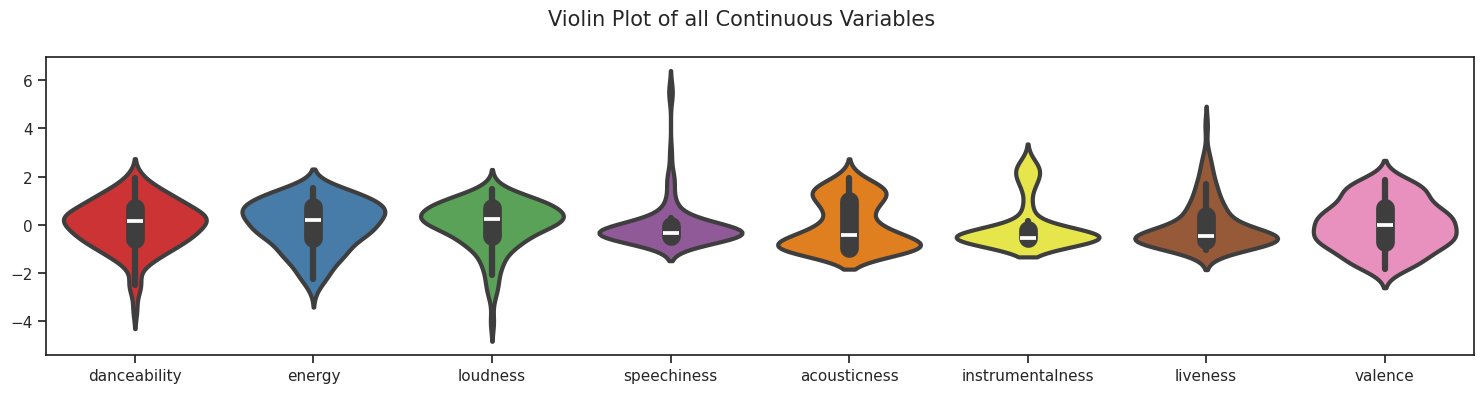

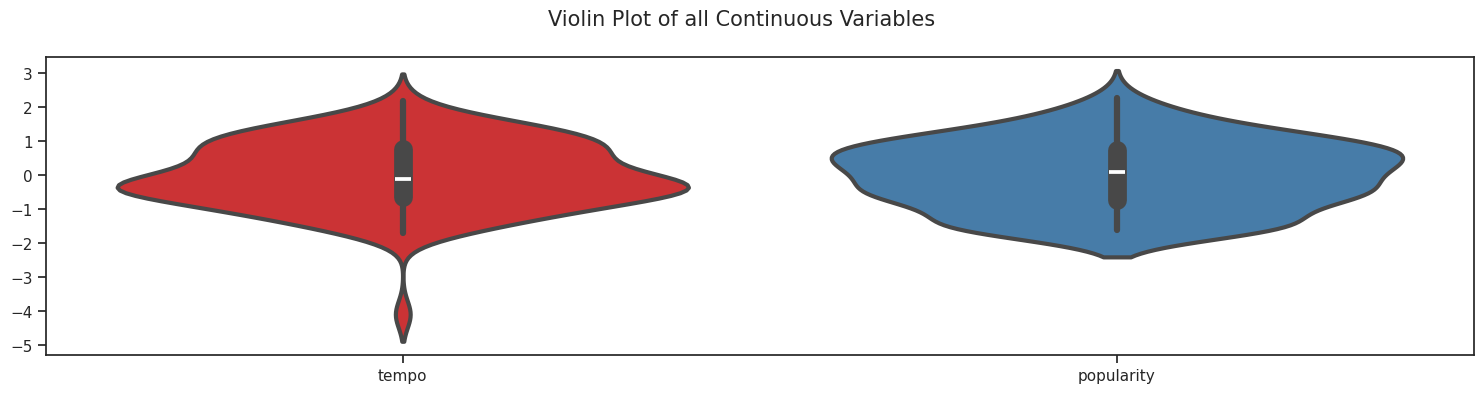

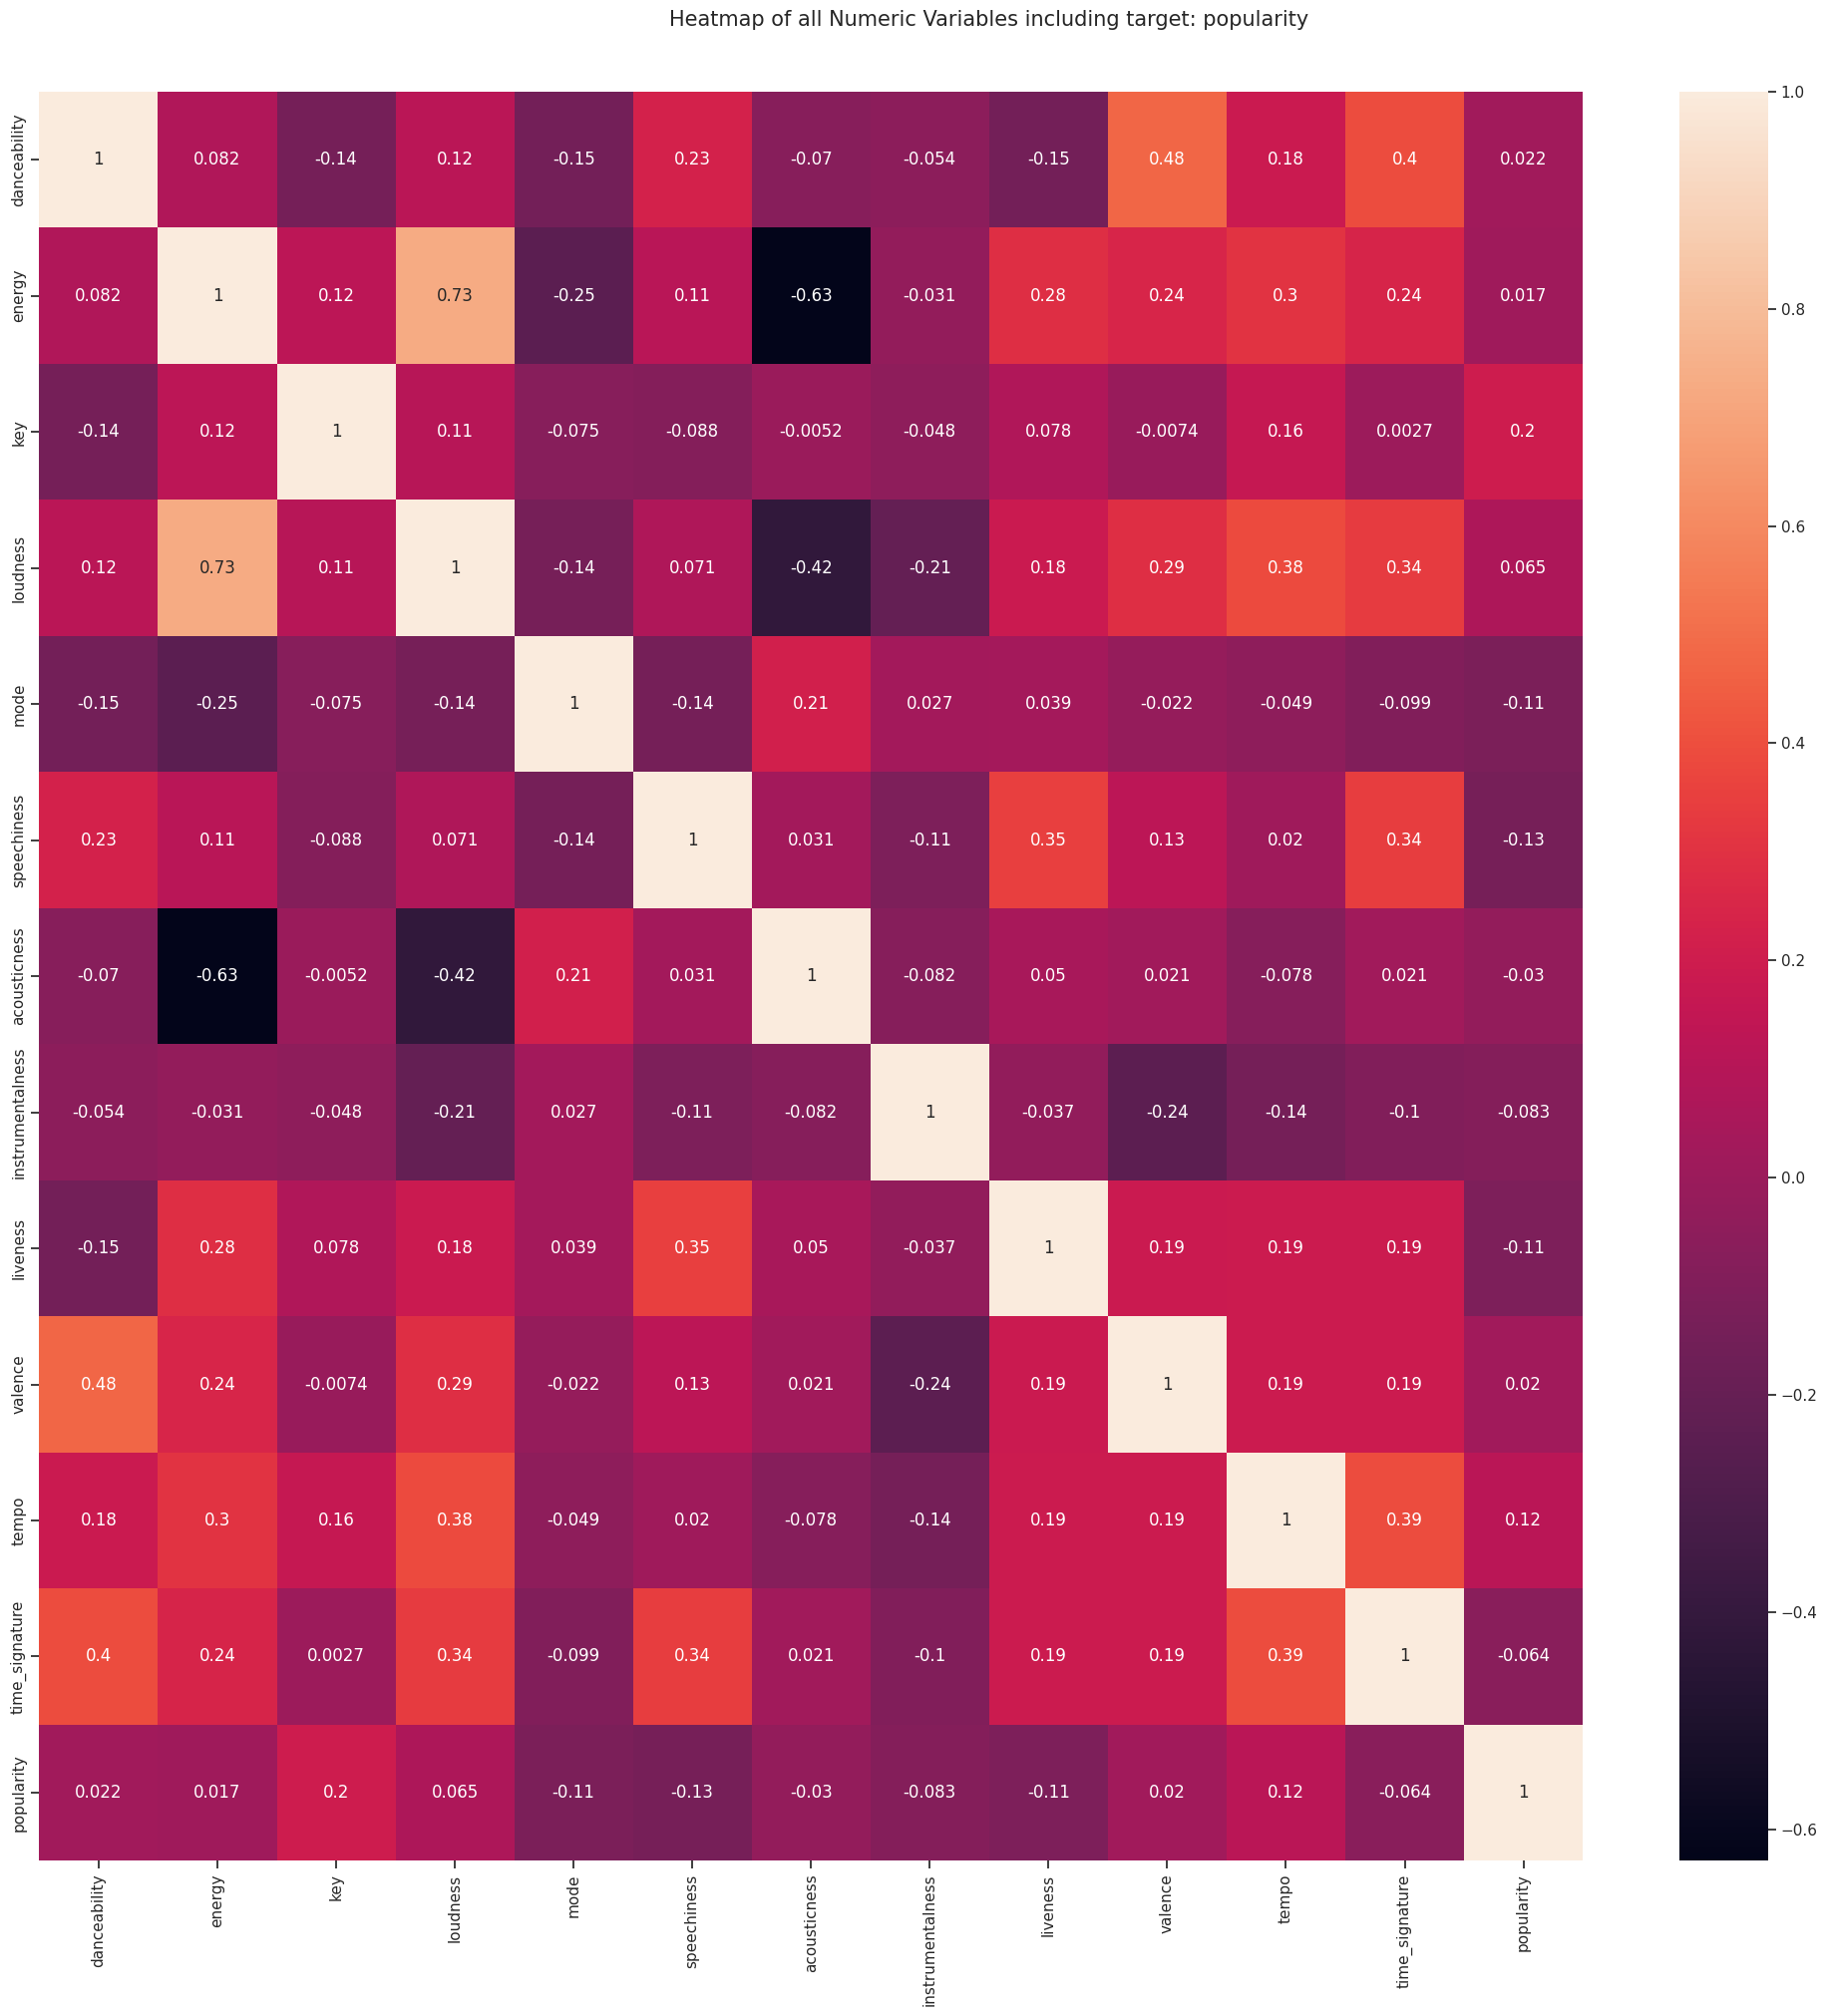

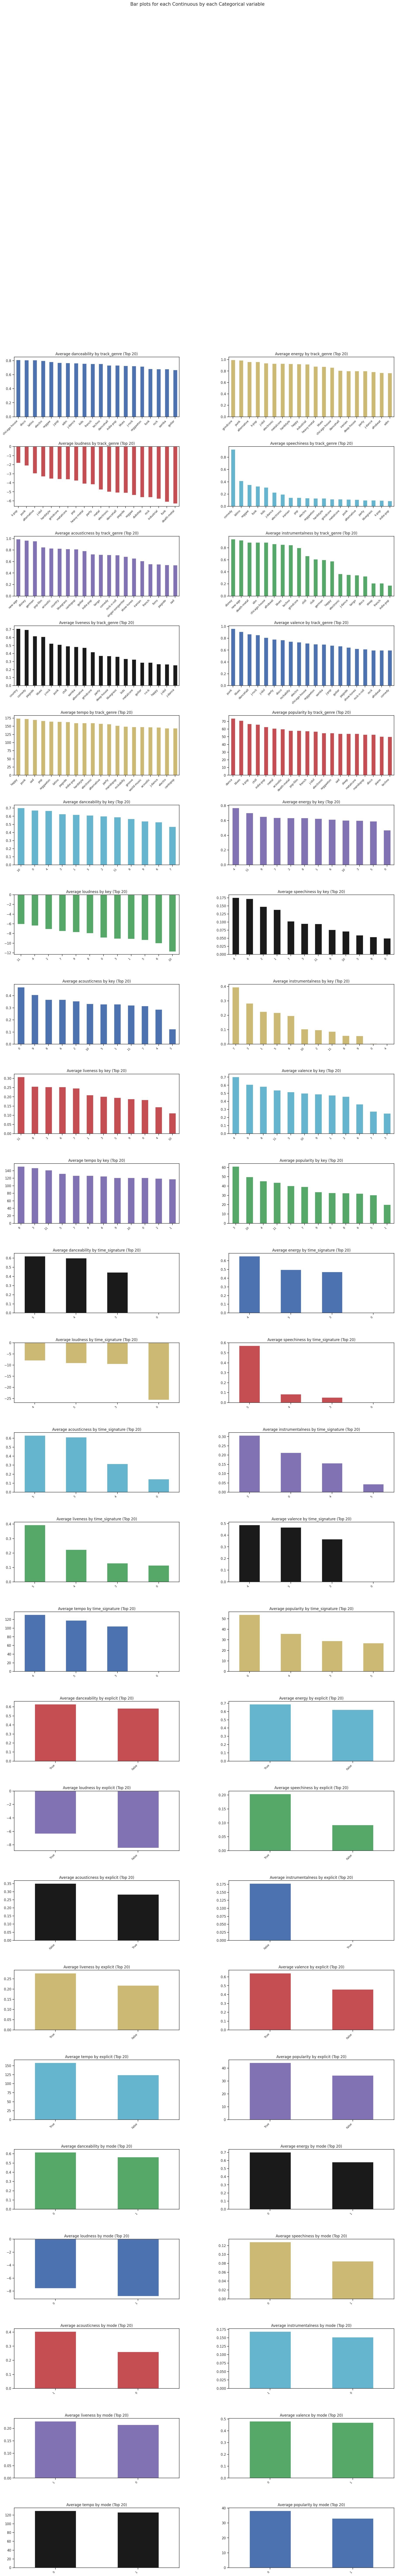

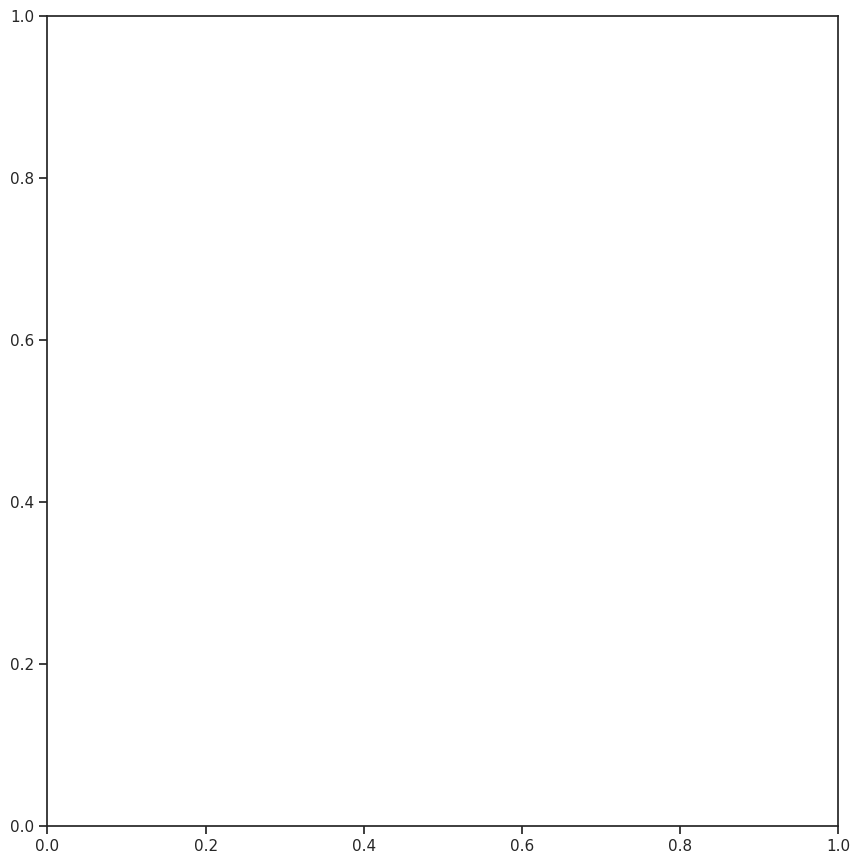

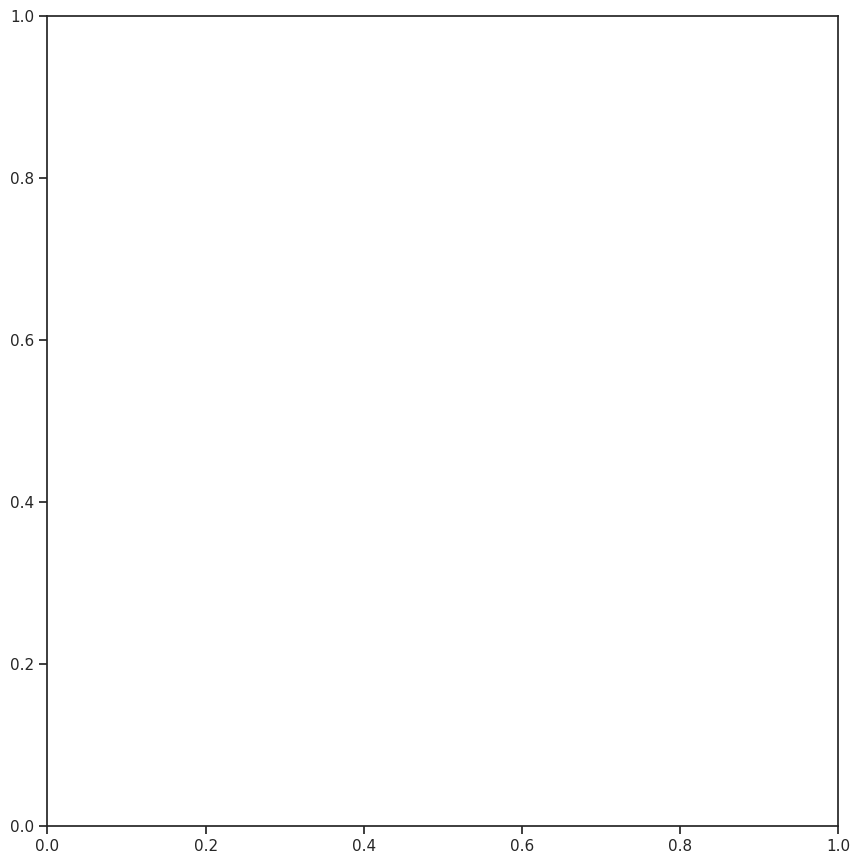

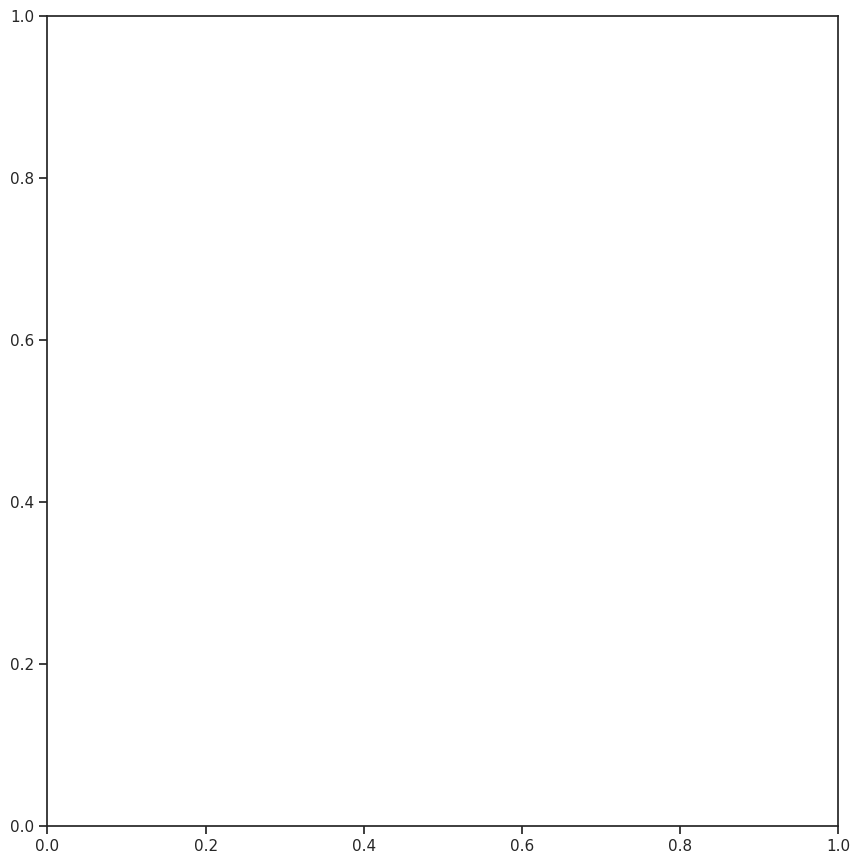

In [ ]:
# Now lets see how can we graph all possible usefull visualizations quickly ! (with Autoviz)

#Installation
!pip install autoviz

#Necessary libraries

import pandas as pd
import numpy as np

#Load Autoviz
from autoviz import AutoViz_Class
%matplotlib inline

AV = AutoViz_Class()
filename = df
target_variable = "popularity"

dft = AV.AutoViz(
    filename,
    sep=",",
    depVar=target_variable,
    dfte=None,
    header=0,
    verbose=2,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=100,
    max_cols_analyzed=20,
    save_plot_dir=None
)

## 🚀 Recommender with Open AI embeding model and Vector Database
---

Firstly obtain and load you API key safely
.

1. log in [OpenAI platform](https://platform.openai.com/docs/api-reference/introduction) and get your API_KEY.
2. save your api key in env.py file (just add the line of code tot he env.py below)

`os.environ["OPENAI_API_KEY"] = "add your api key here"`
3. load it and save to `openai_api_key` variable

In [ ]:
#env.py file

import os

# Set your OpenAI API key (You can find your key in OpenAI Dashboard)
os.environ["OPENAI_API_KEY"] = "sk-proj-XXXXXXXXX_Z48Q-UzgIkQfWbZH8T7p5jiRarLf8e8E-MP4ScTML6-7T3BlbkFJpQQYv7xEHchfKHbMJr_bmHjDlZDueRXRImxHSHxW3RqpBhqD8Vi2M9L684uV5e2TueZ43YgZAA"


In [ ]:
import openai
import os
from dotenv import load_dotenv

load_dotenv('env.py')
openai_api_key = os.getenv("OPENAI_API_KEY")
openai_api_key

In [ ]:
# as we going to turn the text into enbeddings (vectors), we simply need to add all the columns in a one string for simplicity
def create_textual_representation(row):
    return f"""Track: {row['track_name']}, Artist: {row['artists']},
    Album: {row['album_name']}, Popularity: {row['popularity']}"""

df['textual_representation'] = df.apply(create_textual_representation, axis=1)

**Generate OpenAI Embeddings.**
Now we use open ai embedding model - `text-embedding-3-small` to turn words into numerical representation(vectors)

In [ ]:
import openai
import numpy as np

def get_openai_embedding(text):
    openai.api_key = "your_key"  # Replace with your actual key
    response = openai.embeddings.create(input=text, model="text-embedding-3-small")
    return response.data[0].embedding

embeddings = np.array([get_openai_embedding(text) for text in df['textual_representation']])

## 🔍 Step 5: Use FAISS for Similarity Search

1. embeddings is a NumPy array that stores the vector representations of textual data.
.shape[1] extracts the number of columns (features), which represents the embedding size.


```
embeddings.shape  # (1000, 1536)  # 1000 samples, each with 1536 features
dimension = 1536

```
2.



In [ ]:
import faiss

#1 - Get the Embedding Dimension
dimension = embeddings.shape[1]

#2 - creates an index to store and search for embeddings using L2 (Euclidean) distance.
index = faiss.IndexFlatL2(dimension)

#3 - Add Embeddings to the FAISS Index for fast similarity search.
index.add(embeddings)

## 🎵 Recommendation Function

In [ ]:
def recommend_similar_items(query_text, top_k=5):

    # 1 -  Convert query text to an embedding, Reshape it to 2D (reshape(1, -1)) for FAISS.
    query_embedding = np.array(get_openai_embedding(query_text)).reshape(1, -1)

    # 2 -  Search for similar embeddings using index.search().
    #distances: The similarity scores (lower is better for FAISS using L2 distance).
    #indices: The row indices in df that correspond to the most similar embeddings.

    distances, indices = index.search(query_embedding, top_k)
    return df.iloc[indices[0]]

query = "I like jazz"
recommendations = recommend_similar_items(query)
print(recommendations[['track_name', 'artists', 'album_name', 'popularity']])

                             track_name                     artists  \
87    Little Jack Horner - Original Mix  Cameron's Bedtime Classics   
65                           I Like You                  Ben Rector   
72                              Lucille              Little Richard   
9   Proibida Pra Mim (Grazon) - Ao Vivo           Charlie Brown Jr.   
25                    Ready fi di party             Tony Matterhorn   

                      album_name  popularity  
87  Lullabies and Nursery Rhymes          19  
65        The Walking in Between          56  
72                   Good Golly!          56  
9             Acústico (Ao Vivo)          48  
25                Jamaican Style          19  


**notebooks**

1. [Item based recommender ](https://www.kaggle.com/code/mehmetisik/item-based-collaborative-filtering)
2. [My Knn Google recommender project (user based)](https://www.kaggle.com/code/albinakrasykova/eda-explanation-adding-more-features-to-knn)
3. [embedings article by Google](https://developers.google.com/machine-learning/crash-course/embeddings)
4. [Kaggle courses](https://www.kaggle.com/learn)

